# Multiple Linear Regression

Linear regression is a algorithm which is starting level algorithm for machine learning prediction. 
This code contains only about how we can genrate our own linear data with some noise and also to get 
a good output result out of it. The code is fully moduler so that to keep in mind about the use of 
the functions in other programs also.

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing data which we'll work on

In [ ]:
data=pd.read_csv('Breast_Cancer_Data.csv')

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [ ]:
data.drop([data.columns[0],data.columns[32]],axis = 1,inplace = True)

Funtion for Standardizing data

In [3]:
def Standardize(data):
    return (data-np.mean(data,axis=0))/np.std(data,axis=0)

Data Preprocessing (and adding the intercept column to x as well)

In [4]:
y=data.iloc[:,-1].values
x=data.iloc[:,0:4]
x=pd.get_dummies(x)
x=np.array(x)
y=y.reshape(y.shape[0],1)
x=Standardize(x)
y=Standardize(y)
x=np.append(arr=np.ones((x.shape[0],1)),values=x.astype(float),axis=1)

Funtion to predict regression output

In [5]:
def predict(theta,xi):
    return xi@theta.T

Mean Squared Error Function

In [6]:
def sq_loss(theta,x,y):
    return (np.sum(np.power(((x@theta.T)-y),2)))/2*len(x)

Funtion to calculate Gradients of the loss

In [7]:
def gradients(theta,x,y):
    return (np.sum(x*(x@theta.T-y),axis=0))/len(x)

Fit funtion to tune the regression parameters

In [8]:
def fit(x,y,alpha,epsilon):
    ti=np.zeros((1,x.shape[1]))
    i=0
    j=0
    error=1
    loss=sq_loss(ti,x,y)
    losslist=[]
    iterlist=[]
    while error>epsilon:
        gt=gradients(ti,x,y)
        theta=ti-alpha*gt
        ti=theta
        loss_final=sq_loss(theta,x,y)
        error=abs(loss_final-loss)
        losslist.append(loss)
        iterlist.append(i)
        loss=loss_final
        i+=1
    plt.plot(iterlist,losslist)
    plt.xlabel('Iterations')
    plt.title('Loss curve')
    plt.ylabel('Loss')
    return theta

Funtion to plot a line from slope and intercept

In [9]:
def line(slope, intercept):
    axes=plt.gca()
    x=np.array(axes.get_xlim())
    y=intercept+slope*x
    plt.plot(x, y,'--r',linewidth=2)

Splitting training and testing data

In [10]:
train_len=int(x.shape[0]*0.7)
y.reshape(y.shape[0],1)
x_train=x[:train_len,:]
x_test=x[train_len:,:]
y_train=y[:train_len]
y_test=y[train_len:]

Fitting our model

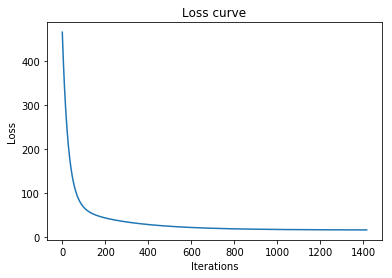

In [11]:
alpha=0.01
epsilon=0.001
t=fit(x_train,y_train,alpha,epsilon)

Mean Training error

In [12]:
sq_loss(t,x_train,y_train)

16.814935245734503

In [13]:
training_error=abs(y_train-predict(t,x_train))
mean_training_error=np.sum(training_error)/training_error.shape[0]
mean_training_error

0.132617609455793

Predicting the result

In [14]:
result=predict(t,x_test)

Mean Testing error

In [15]:
sq_loss(t,x_test,y_test)

13.546960476710012

In [16]:
testing_error=result-y_test
testing_error=abs(testing_error)
mean_testing_error=np.sum(testing_error)/testing_error.shape[0]
mean_testing_error

0.26523659666350435